<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Goolge_CoLab_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 64kB/s 
     |████████████████████████████████| 3.1MB 50.3MB/s 
     |████████████████████████████████| 501kB 27.9MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, Concatenate, GlobalMaxPooling2D, MaxPooling1D, GaussianNoise, BatchNormalization, MaxPooling2D, SimpleRNN, GRU, LSTM, GlobalMaxPooling1D, Embedding, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import mnist

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
from scipy import stats
import math
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
import re
import os

### Loading the Data

In [0]:
mnist = mnist

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
np.max (X_train[0])

255

In [0]:
X_train = X_train / 255.0 * 2 + 1
X_test = X_test / 255.0 * 2 + 1

In [0]:
X_train = X_train.reshape (-1, 28**2)

In [0]:
X_test = X_test.reshape (-1, 28**2)

In [0]:
latent = 128

### *Discrimnator*

In [0]:
def discriminator_nn (image):
  i = Input (shape=(image,))
  x = Dense (512, activation=LeakyReLU(alpha=0.2))  (i)
  x = Dense (256, activation=LeakyReLU(alpha=0.2))  (x)
  x = Dense (1, activation='sigmoid') (x)
  model = Model (i, x)
  return model

In [0]:
discriminator = discriminator_nn (28**2)
discriminator.compile (
    loss = 'binary_crossentropy',
    optimizer = Adam (0.0002, 0.5),
    metrics=['accuracy']
)

### *Generator*

In [0]:
def generator_nn (latent):
  i = Input (shape=(latent,))
  x = Dense (256, activation=LeakyReLU(alpha=0.2))  (i)
  x = BatchNormalization (momentum=0.8) (x)
  x = Dense (512, activation=LeakyReLU(alpha=0.2))  (x)
  x = BatchNormalization (momentum=0.8) (x)
  x = Dense (1024, activation=LeakyReLU(alpha=0.2))  (x)
  x = BatchNormalization (momentum=0.8) (x)
  x = Dense (28**2, activation='tanh') (x)

  model = Model (i, x)
  return model

In [0]:
generator = generator_nn (latent)
z = Input (shape=(latent,)) # noise sample
image = generator (z) # pass z into the generator

In [0]:
discriminator.trainable = False # freeze weights

In [0]:
fake_pred = discriminator (image) # pass 'image' into discrimator, labeled 'real', this will be flipped later

In [0]:
combined = Model (z, fake_pred)

In [0]:
combined.compile (
    loss = 'binary_crossentropy',
    optimizer = Adam (0.0002, 0.5)
)

### *Training*

In [0]:
batch = 32
epochs = 30000
sample_period = 200 # show a sample every 'n' periods

In [0]:
ones = np.ones (batch) # creating batch labels ahead of time

In [0]:
zeros = np.zeros (batch)

In [0]:
d_losses = []
g_losses = []

In [0]:
os.makedirs ('gan_images') # storage

In [0]:
def sample_images (epoch):
  rows, cols = 5, 5
  noise = np.random.randn (rows*cols, latent)
  images = generator.predict (noise) # have the generator make a sample image from the noise

  images = 0.5 * images + 0.5 # rescaling to be between 0 and 1

  fig, axs = plt.subplots (rows, cols)
  idx = 0
  for i in range(rows):
    for j in range(cols):
      axs[i, j].imshow(images[idx].reshape(28,28), cmap='gray')
      axs[i, j].axis('off')
      idx += 1 # this is just graphing 1 by 1
  fig.savefig ('gan_images/%d.png' % epoch)
  plt.close()

Discriminator Loss : 0.9625767469406128
Generator Loss : 0.41321164
Epoch : 0
Discriminator Loss : 0.7529565691947937
Generator Loss : 0.021423183
Epoch : 200
Discriminator Loss : 0.7264446020126343
Generator Loss : 0.0066946815
Epoch : 400
Discriminator Loss : 0.7158931493759155
Generator Loss : 0.004033385
Epoch : 600
Discriminator Loss : 0.7084076404571533
Generator Loss : 0.0030049793
Epoch : 800
Discriminator Loss : 0.7083216309547424
Generator Loss : 0.002480574
Epoch : 1000
Discriminator Loss : 0.7085483074188232
Generator Loss : 0.001620293
Epoch : 1200
Discriminator Loss : 0.7036685943603516
Generator Loss : 0.0011982427
Epoch : 1400
Discriminator Loss : 0.7025765776634216
Generator Loss : 0.0010491095
Epoch : 1600
Discriminator Loss : 0.7033768892288208
Generator Loss : 0.0012460063
Epoch : 1800
Discriminator Loss : 0.7011598348617554
Generator Loss : 0.00084563275
Epoch : 2000
Discriminator Loss : 0.7017800807952881
Generator Loss : 0.00065199484
Epoch : 2200
Discriminator L

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Discriminator Loss : 0.7299323081970215
Generator Loss : 0.00051649613
Epoch : 4200
Discriminator Loss : 0.6986653804779053
Generator Loss : 0.00045471458
Epoch : 4400
Discriminator Loss : 0.6973235607147217
Generator Loss : 0.0004687309
Epoch : 4600
Discriminator Loss : 0.7049547433853149
Generator Loss : 0.0005879405
Epoch : 4800
Discriminator Loss : 0.6968950629234314
Generator Loss : 0.0004537653
Epoch : 5000
Discriminator Loss : 0.6962368488311768
Generator Loss : 0.00034146517
Epoch : 5200
Discriminator Loss : 0.6970897912979126
Generator Loss : 0.00028968864
Epoch : 5400
Discriminator Loss : 0.7085815072059631
Generator Loss : 0.00025482668
Epoch : 5600
Discriminator Loss : 0.6960623860359192
Generator Loss : 0.00026041933
Epoch : 5800
Discriminator Loss : 0.6986430883407593
Generator Loss : 0.00020034026
Epoch : 6000
Discriminator Loss : 0.6960264444351196
Generator Loss : 0.00016297124
Epoch : 6200
Discriminator Loss : 0.6956382989883423
Generator Loss : 0.00014700333
Epoch : 

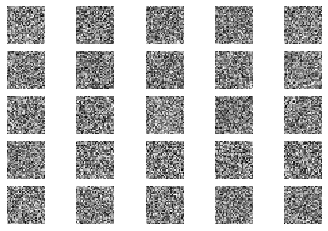

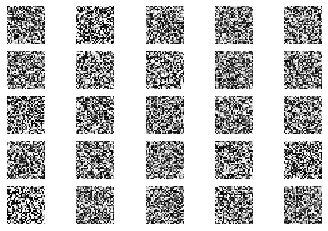

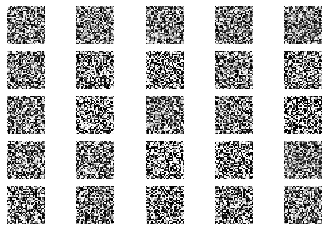

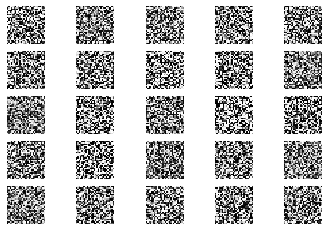

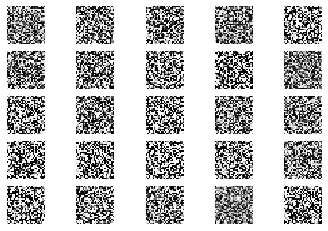

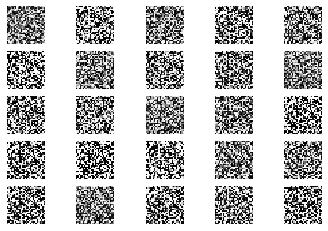

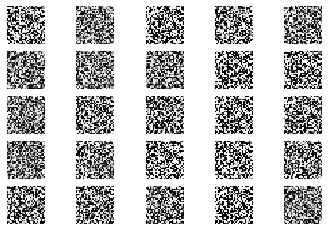

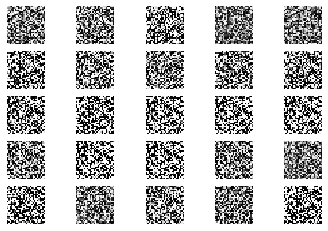

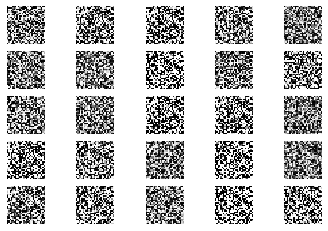

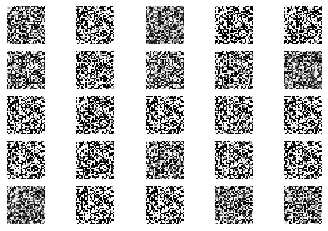

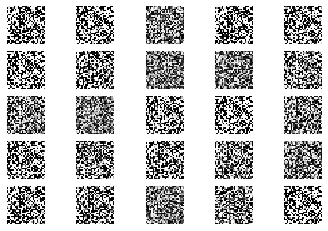

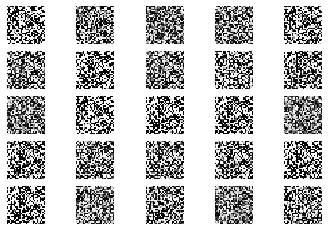

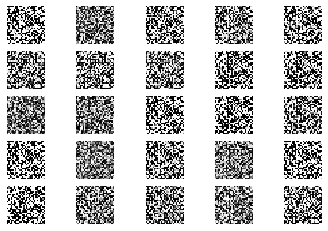

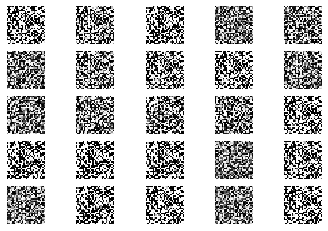

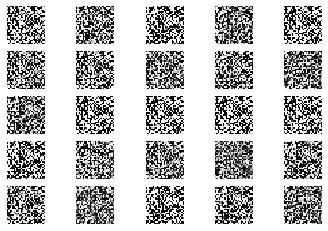

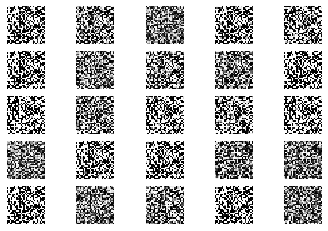

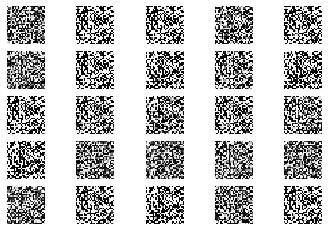

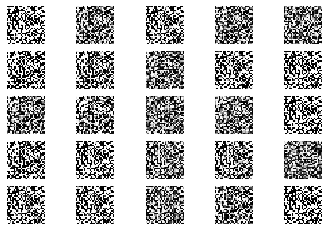

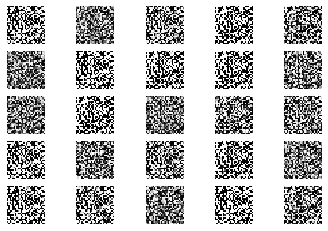

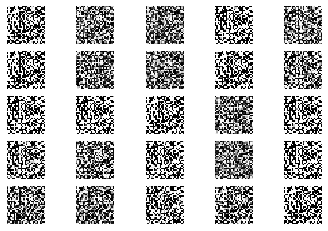

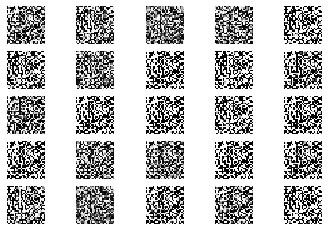

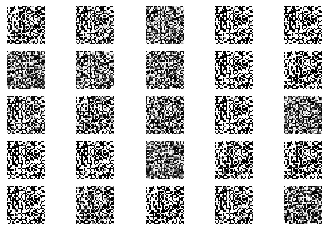

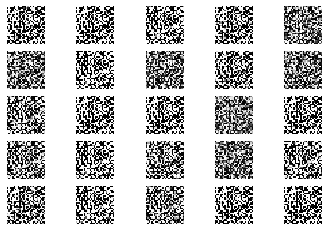

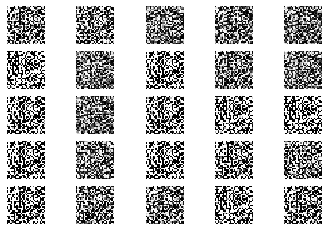

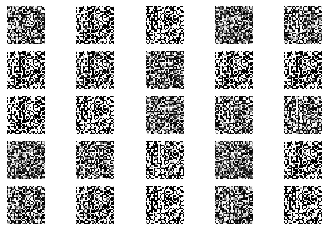

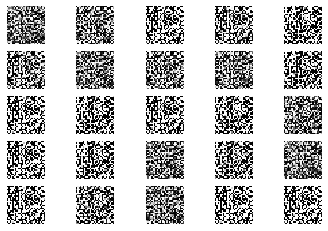

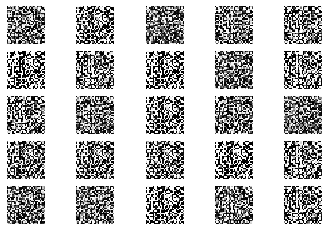

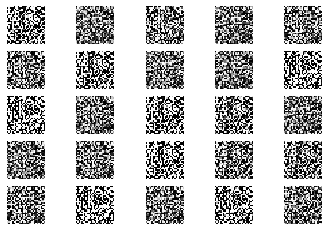

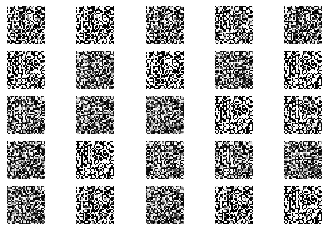

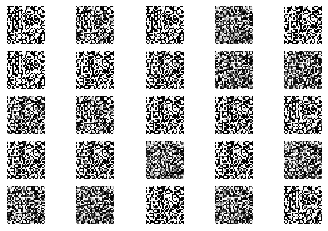

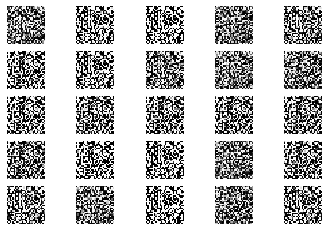

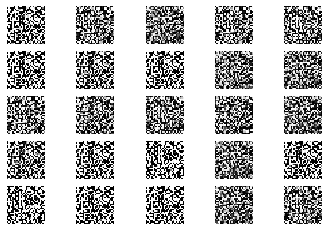

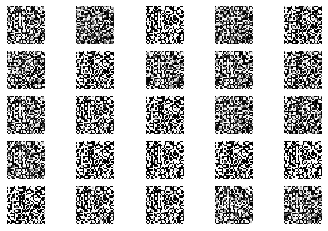

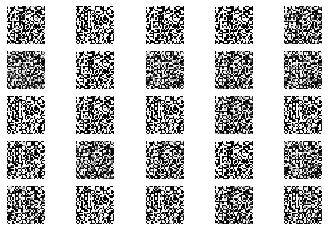

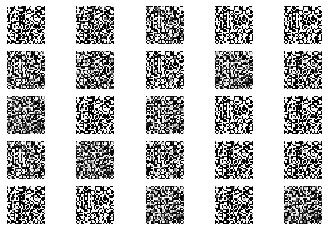

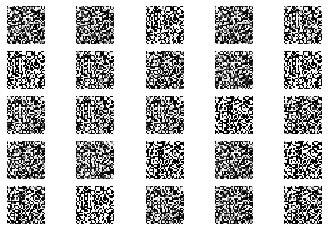

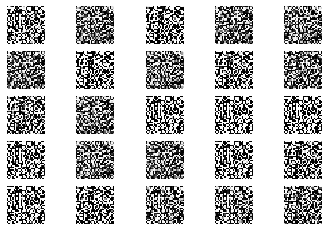

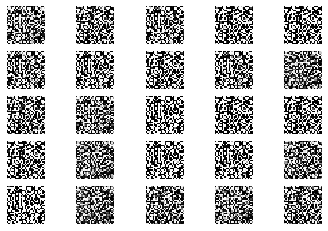

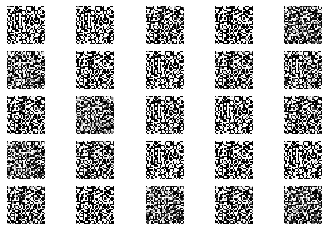

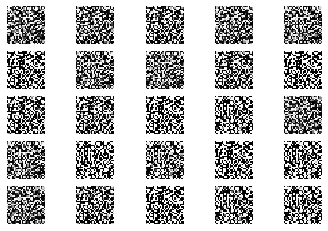

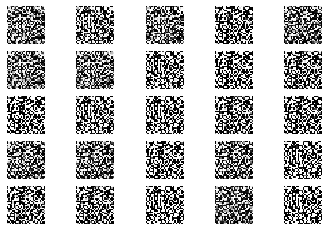

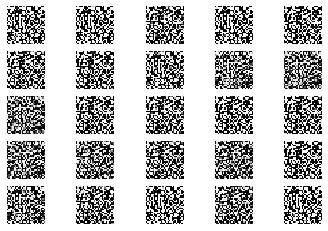

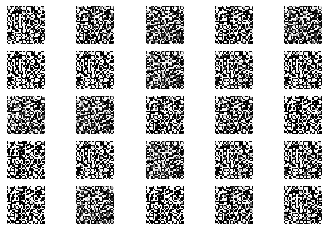

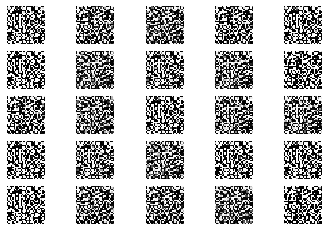

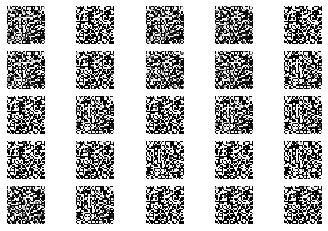

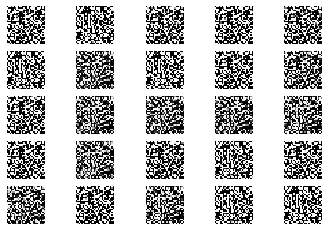

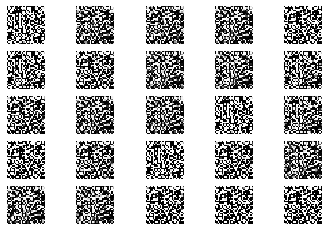

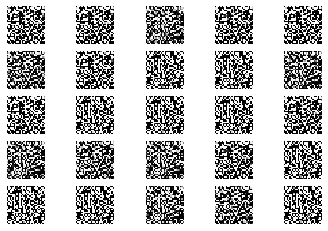

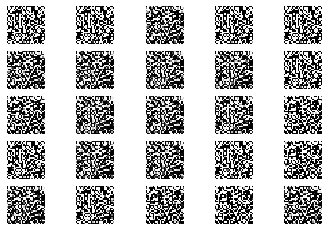

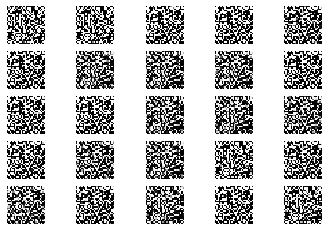

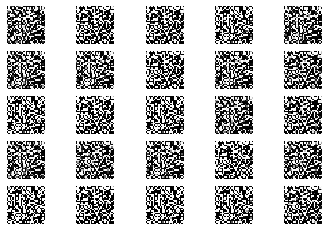

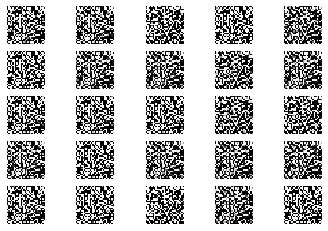

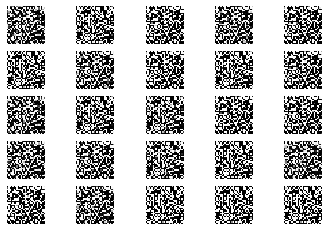

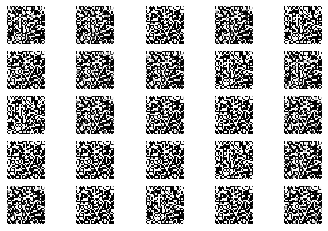

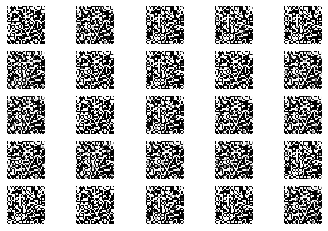

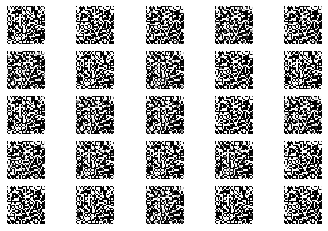

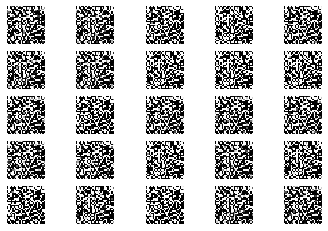

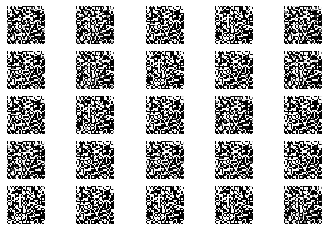

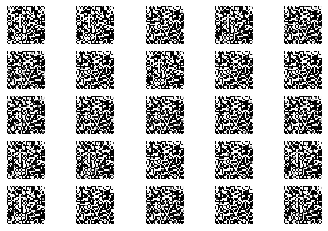

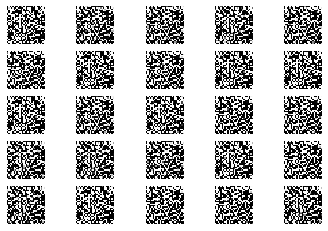

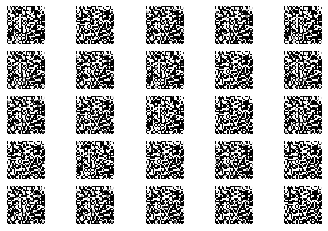

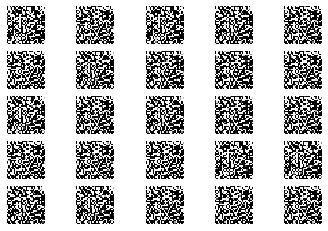

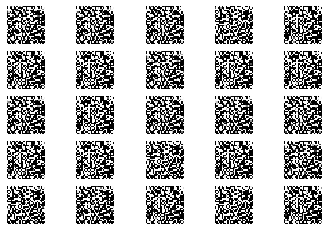

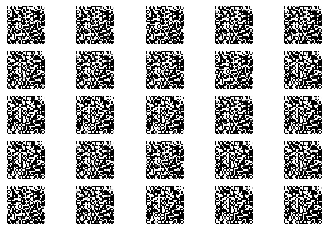

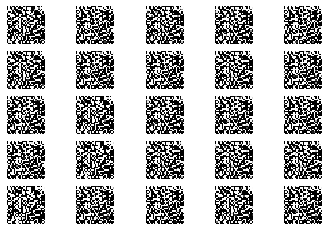

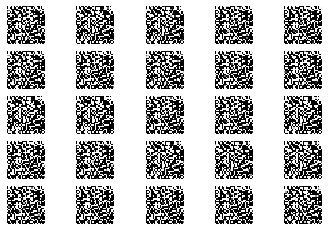

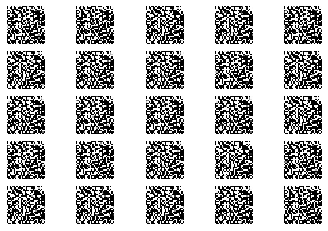

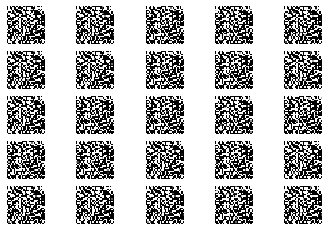

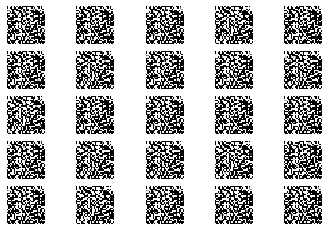

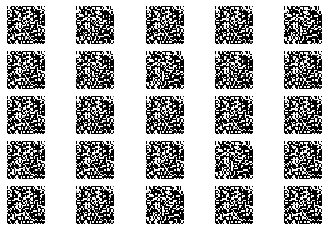

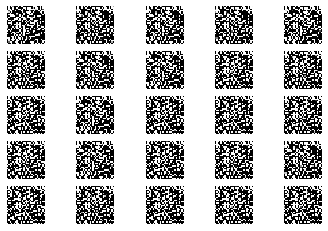

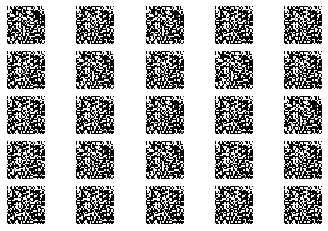

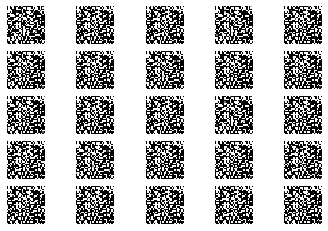

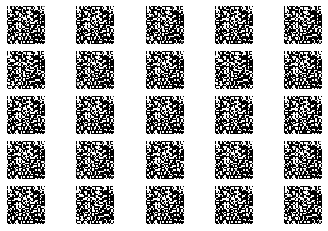

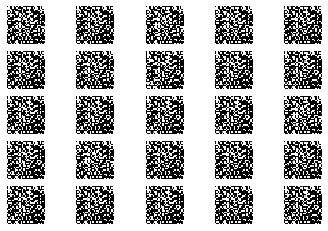

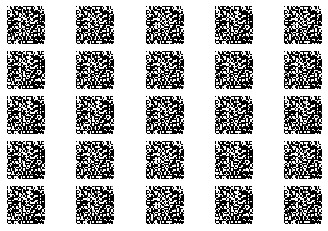

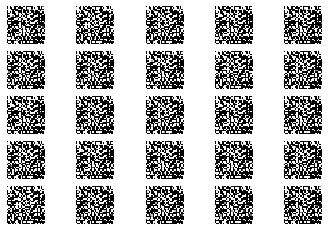

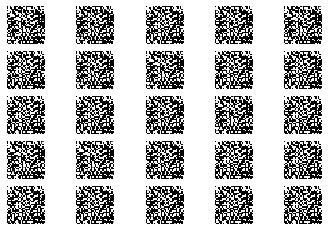

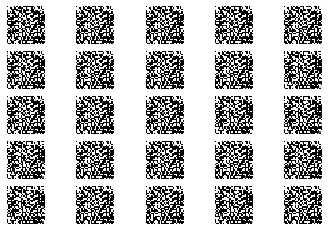

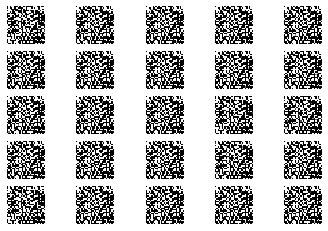

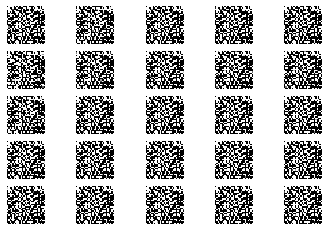

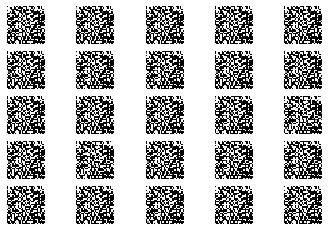

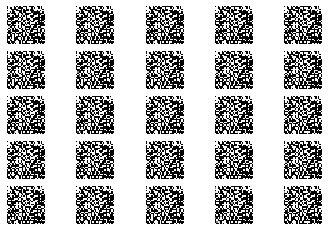

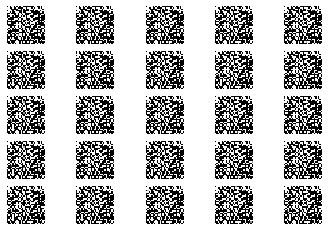

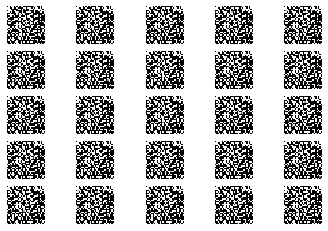

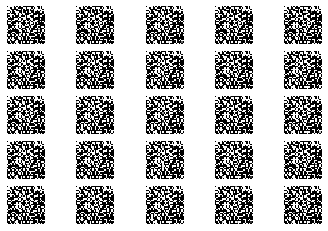

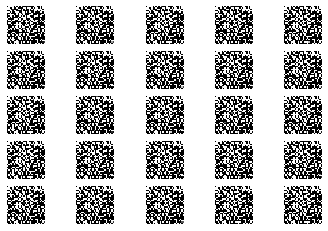

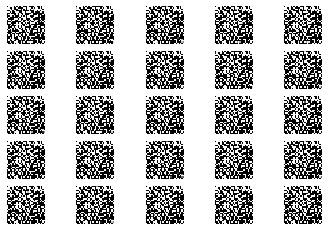

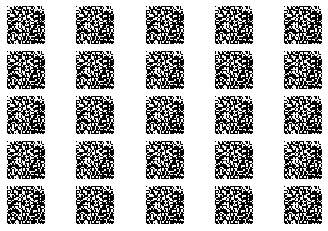

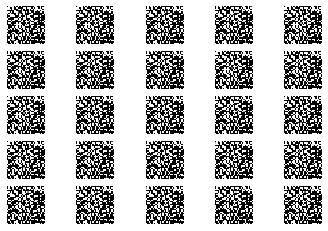

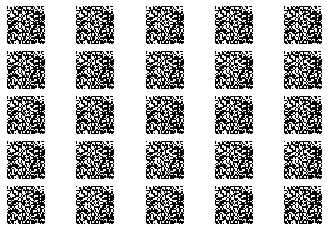

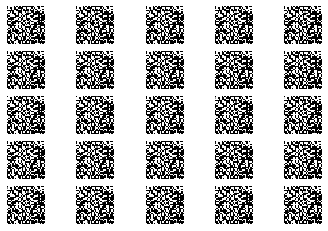

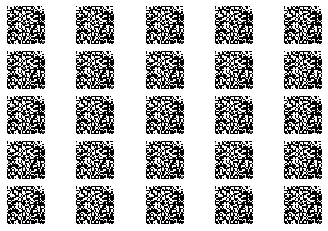

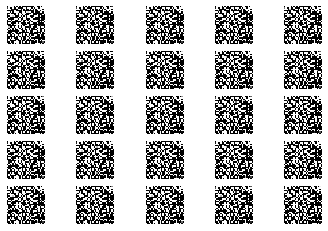

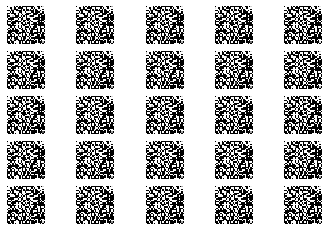

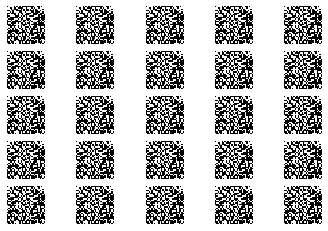

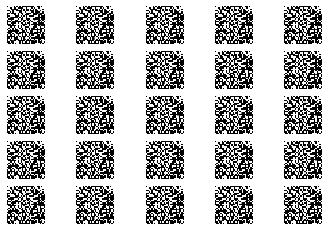

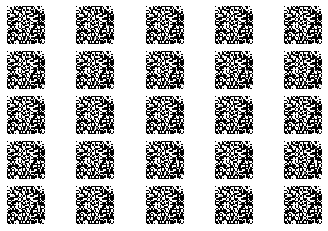

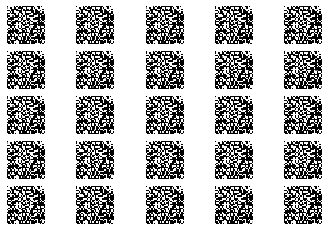

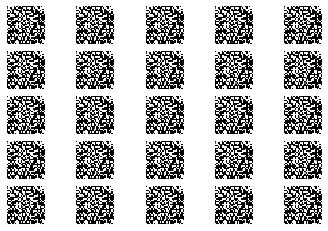

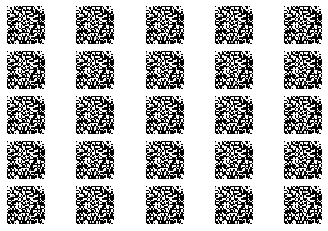

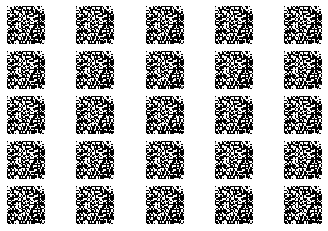

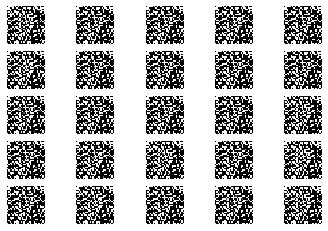

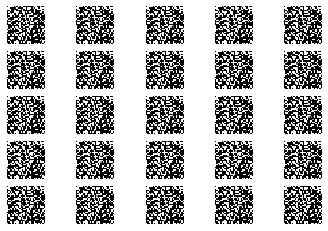

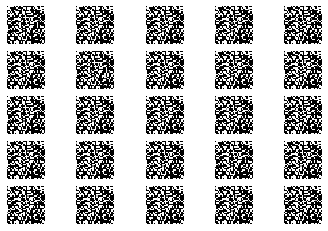

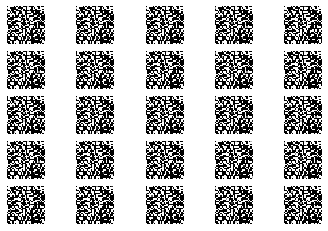

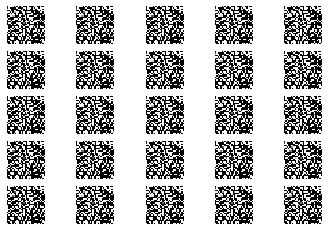

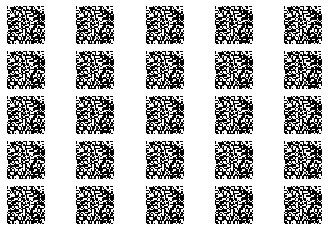

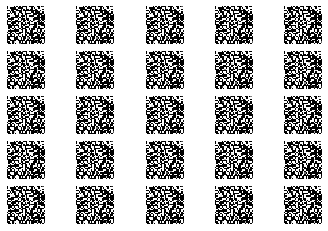

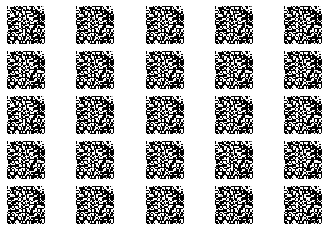

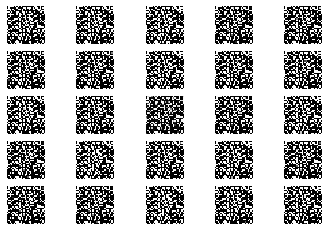

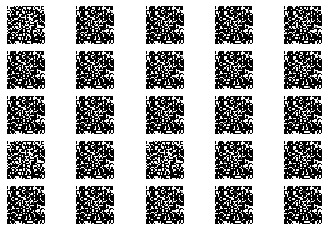

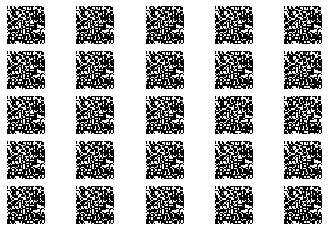

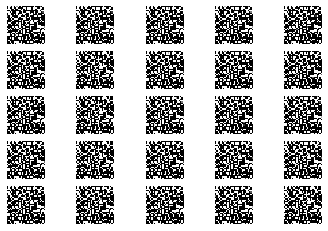

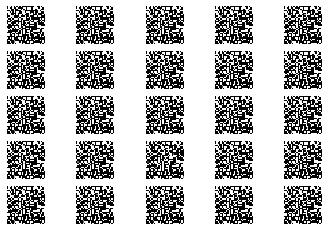

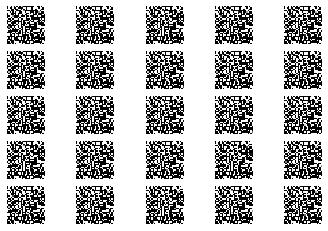

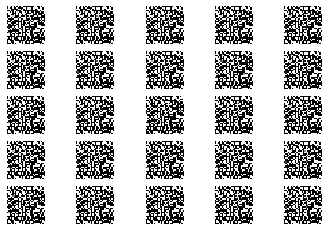

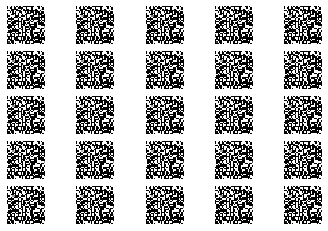

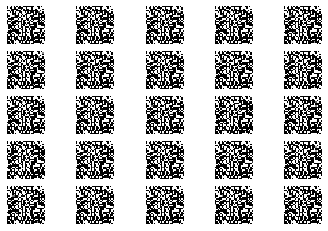

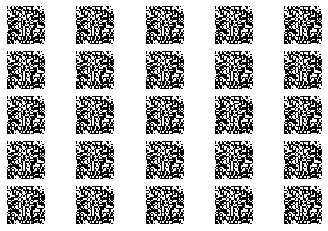

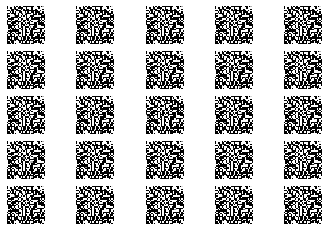

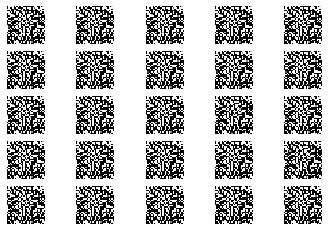

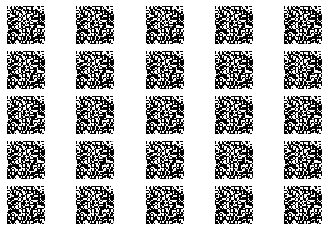

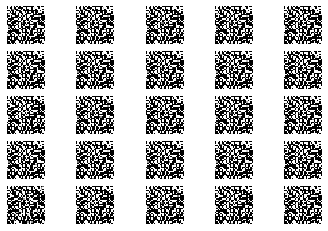

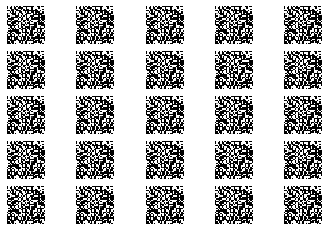

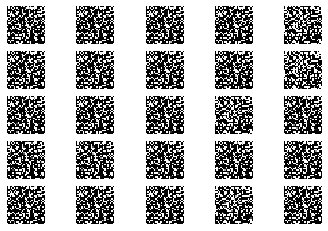

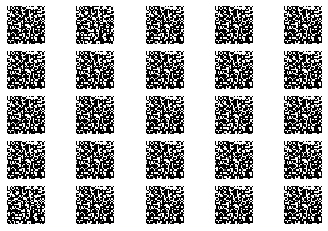

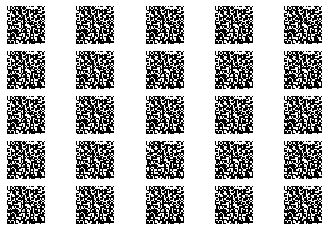

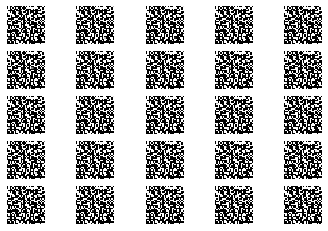

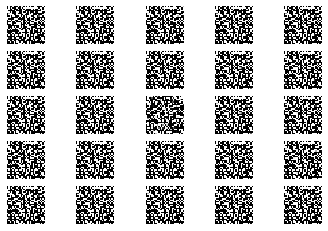

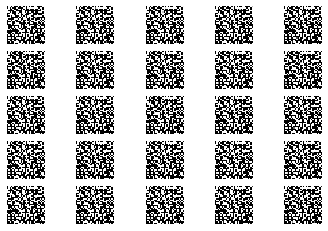

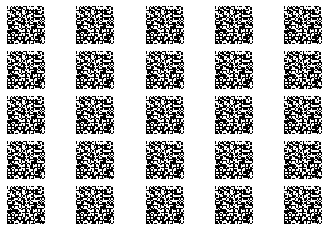

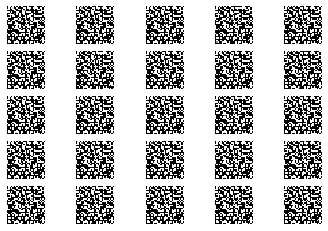

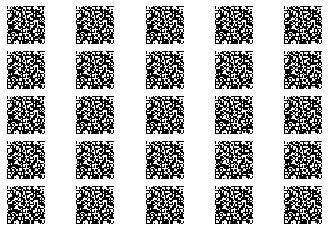

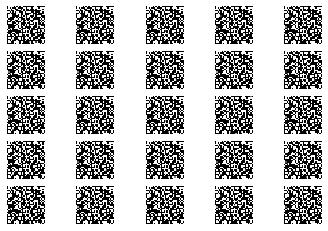

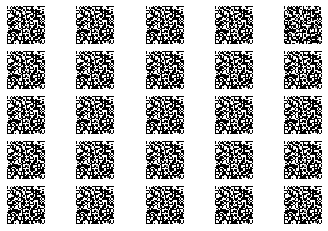

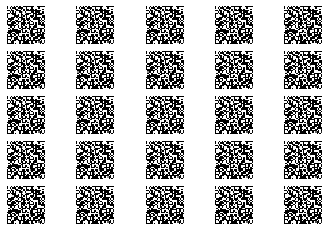

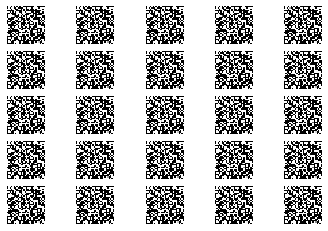

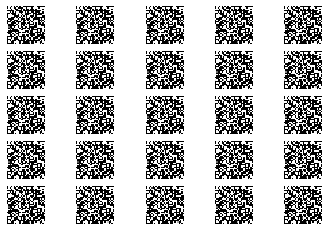

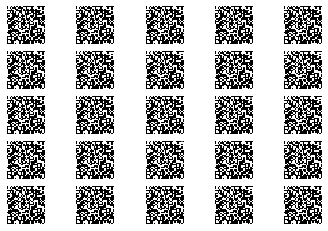

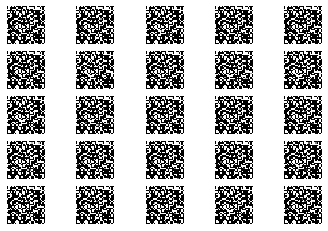

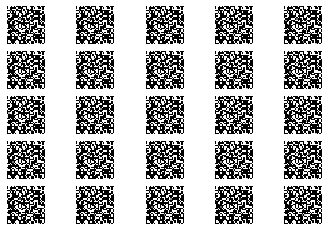

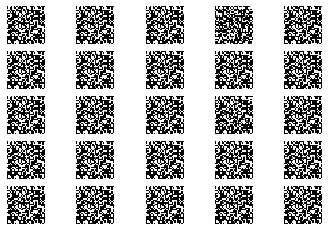

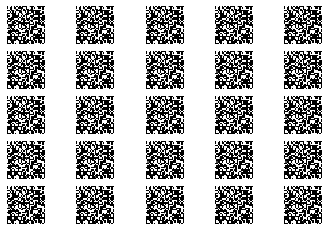

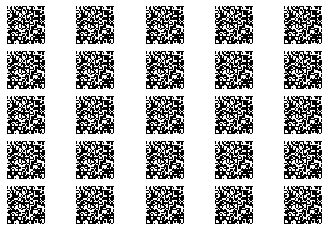

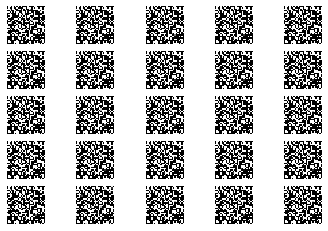

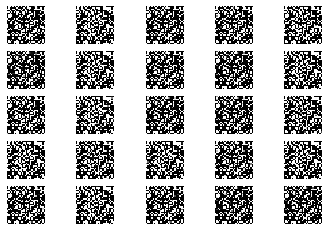

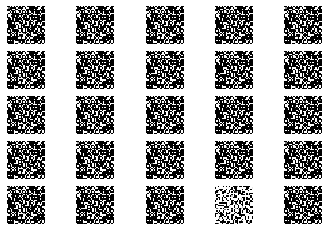

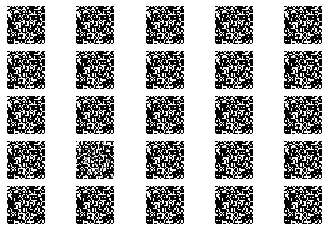

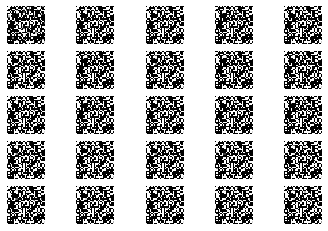

In [57]:
for epoch in range (epochs):
  # train discriminator
  idx = np.random.randint (0, X_train.shape[0], batch) # select random images from index 0 to size of X_train, in a batch size group
  real_images = X_train [idx]

  noise = np.random.randn (batch, latent)
  fake_images = (noise)

  d_loss_real, d_acc_real = discriminator.train_on_batch (real_images, ones) # (X, y)
  d_loss_fake, d_acc_fake = discriminator.train_on_batch (real_images, zeros)

  d_loss = 0.5 * (d_loss_real + d_loss_fake) # mean of losses and accuracies
  d_acc = 0.5 * (d_acc_real + d_acc_fake)

  # train generator
  noise = np.random.randn (batch, latent)
  
  g_loss = combined.train_on_batch (noise, ones) # flipped from discriminator

  d_losses.append (d_loss)
  g_losses.append (g_loss)

  if epoch % 200 == 0:
    print ('Discriminator Loss : %a' %d_loss)
    print ('Generator Loss : %a' %g_loss) 
    print ('Epoch : %a' %epoch )

  if epoch % sample_period == 0:
    sample_images (epoch=epoch)

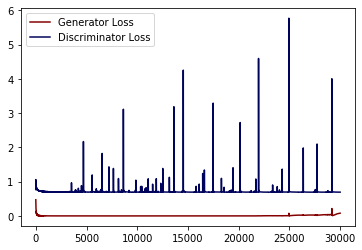

In [58]:
plt.plot (g_losses, label='Generator Loss', color='#840000')
plt.plot (d_losses, label='Discriminator Loss', color='#00035b')
plt.legend ()

### Plotting Results

In [0]:
from skimage.io import imread

In [66]:
a = imread('gan_images/0.png')
plt.show (a)

ValueError: ignored

In [0]:
plt.show (imread('/gan_images/0.png'))

In [0]:
plt.show (imread('gan_iamges/30000.png'))